In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import random
import sys; sys.path.insert(0, '../dpsom/')

from TempDPSOM import get_data_finance

from sklearn.preprocessing import StandardScaler

In [42]:
data_train, data_eval, labels_train, labels_eval = get_data_finance(finance_data_path="../data/yf_basic_price_features.p", 
                                                                    N_companies_train=400, 
                                                                    T_finance_data=144, 
                                                                    scale_fin_data=StandardScaler())

In [68]:
EXP_NAME = 'hyperopt_LSTM_5_2-2_2021-03-19_4317f'
tdpsom_dict = pickle.load(open('../logs/{}/output.p'.format(EXP_NAME), 'rb'))

## 1) initial look at the results

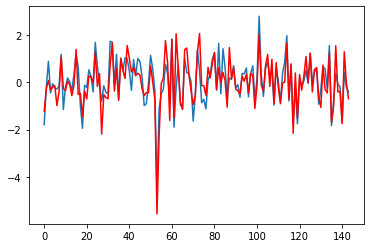

In [73]:
plt.plot(np.reshape(tdpsom_dict["x_rec_train"], (-1, 144, 7))[1, :, 0])
plt.plot(data_train[1, :, 0], color='red')
plt.show()

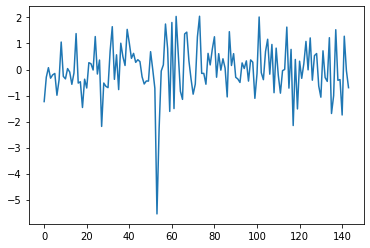

In [55]:
plt.plot(data_train[1, :, 0])

In [62]:
unique, counts = np.unique(tdpsom_dict["k_train"], return_counts=True)

In [63]:
unique

array([0, 1, 2, 3], dtype=int64)

In [64]:
counts

array([ 4462,  2604,  2560, 42214], dtype=int64)

In [65]:
unique, counts = np.unique(tdpsom_dict["k_eval"], return_counts=True)

In [66]:
unique

array([0, 1, 2, 3], dtype=int64)

In [67]:
counts

array([1005,  536,  613, 9366], dtype=int64)

## 2) compute metrics

## 3) plot recons/preds

In [103]:
data_train.shape[2]

7

In [122]:
def plot_tdpsom_results(data_train, data_eval, save_dict, N_companies=4, seed=42, T=144):
    
    
    # select companies for plotting
    N_train = int(len(save_dict["x_rec_train"]) / T)
    N_eval = int(len(save_dict["x_rec_eval"]) / T)
    nr_features = data_train.shape[2]
    
    random.seed(seed)
    train_companies = [(i, "train") for i in random.sample(list(range(N_train)), N_companies)]
    eval_companies = [(i, "eval") for i in random.sample(list(range(N_eval)), N_companies)]
    companies = train_companies + eval_companies

    for i, mode in companies:
        
        print("=================================== {}, company {} ====================================".format(mode, i))
        fig, axs = plt.subplots(nr_features, 3, figsize=(20, 5 * nr_features))

        if mode == "train":
            x = data_train[i]
        else:
            x = data_eval[i]
            
        x_rec = np.reshape(save_dict["x_rec_{}".format(mode)], (-1, T, nr_features))[i]
        x_preds = np.reshape(save_dict["x_preds_{}".format(mode)], (-1, T, nr_features))[i]
        k = np.reshape(save_dict["k_{}".format(mode)], (-1, T))[i]
        
        for j in range(nr_features):
            axs[j, 0].plot(x_rec[:, j], color="red", label="recons")
            axs[j, 0].plot(x[:, j], color="blue", label="ground-truth")
            axs[j, 0].set_title("Reconstructions, company {}-{}, feature {}".format(mode, i, j))

            axs[j, 1].plot(x_preds[:-1, j], color="red", label="preds")
            axs[j, 1].plot(x[1:, j], color="blue", label="ground-truth")
            axs[j, 1].set_title("Predictions, company {}-{}, feature {}".format(mode, i, j))
            
            axs[j, 2].plot(k)
            axs[j, 2].set_title("Clusters, company {}-{}".format(mode, i))
            
        plt.show()
    
    return train_companies, eval_companies

=================================== train, company 327 ====================================


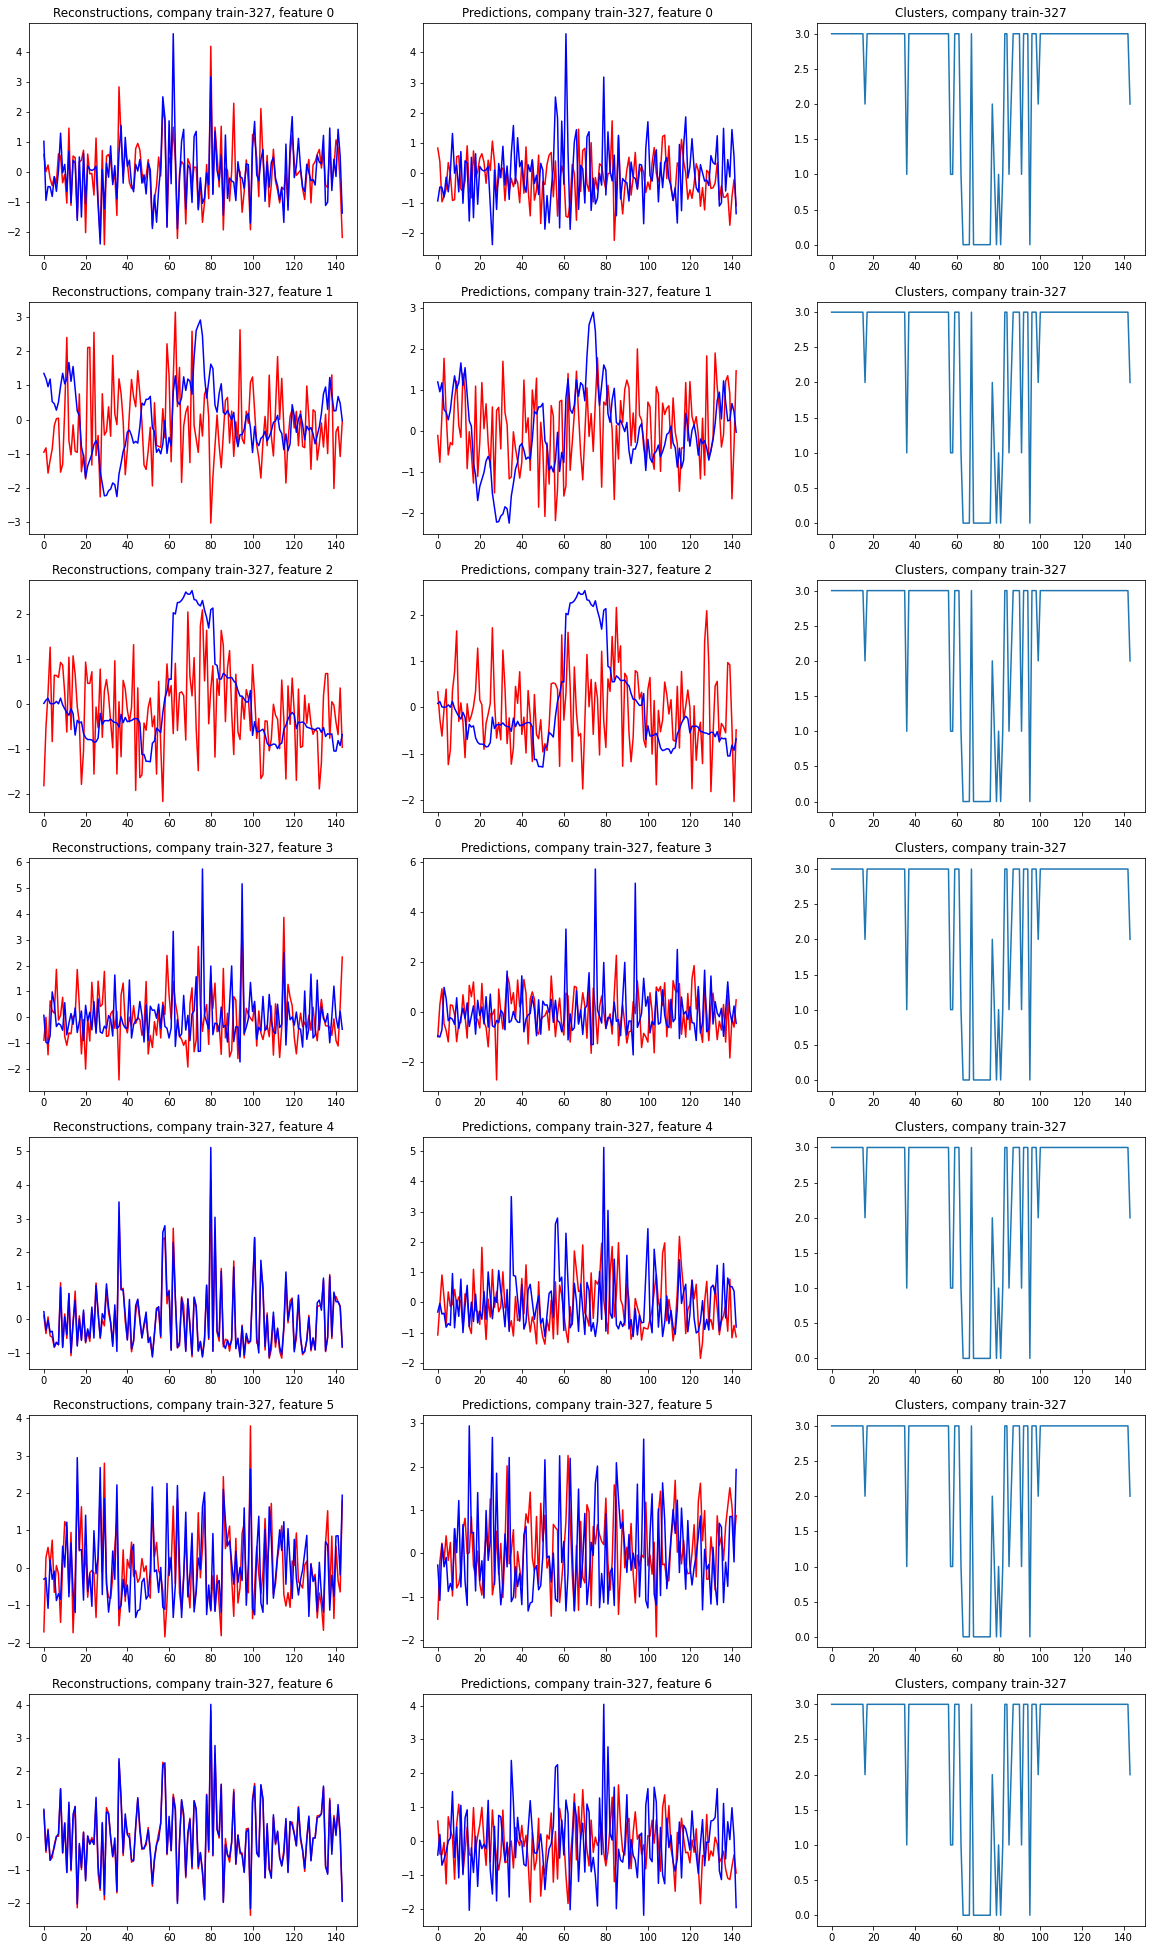

=================================== train, company 57 ====================================


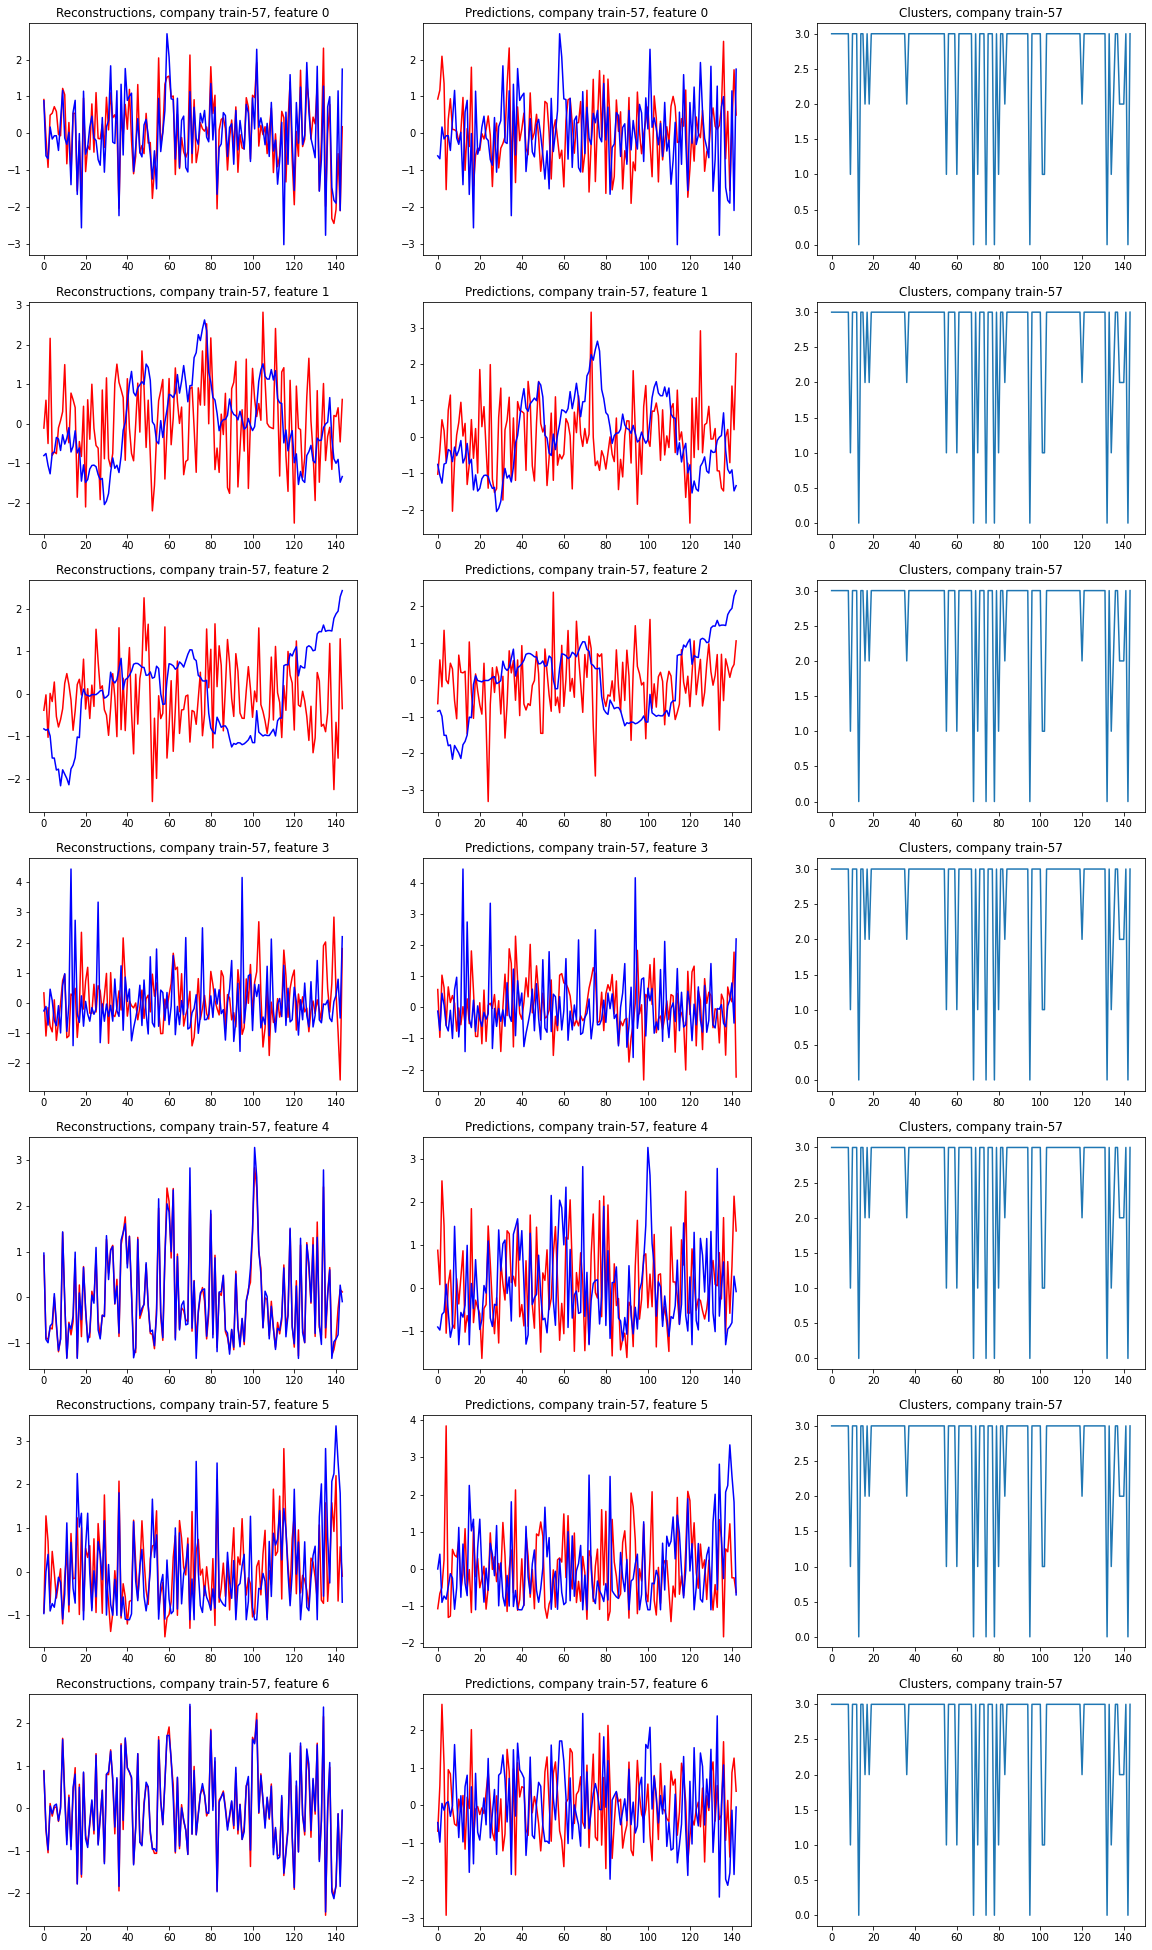

=================================== eval, company 3 ====================================


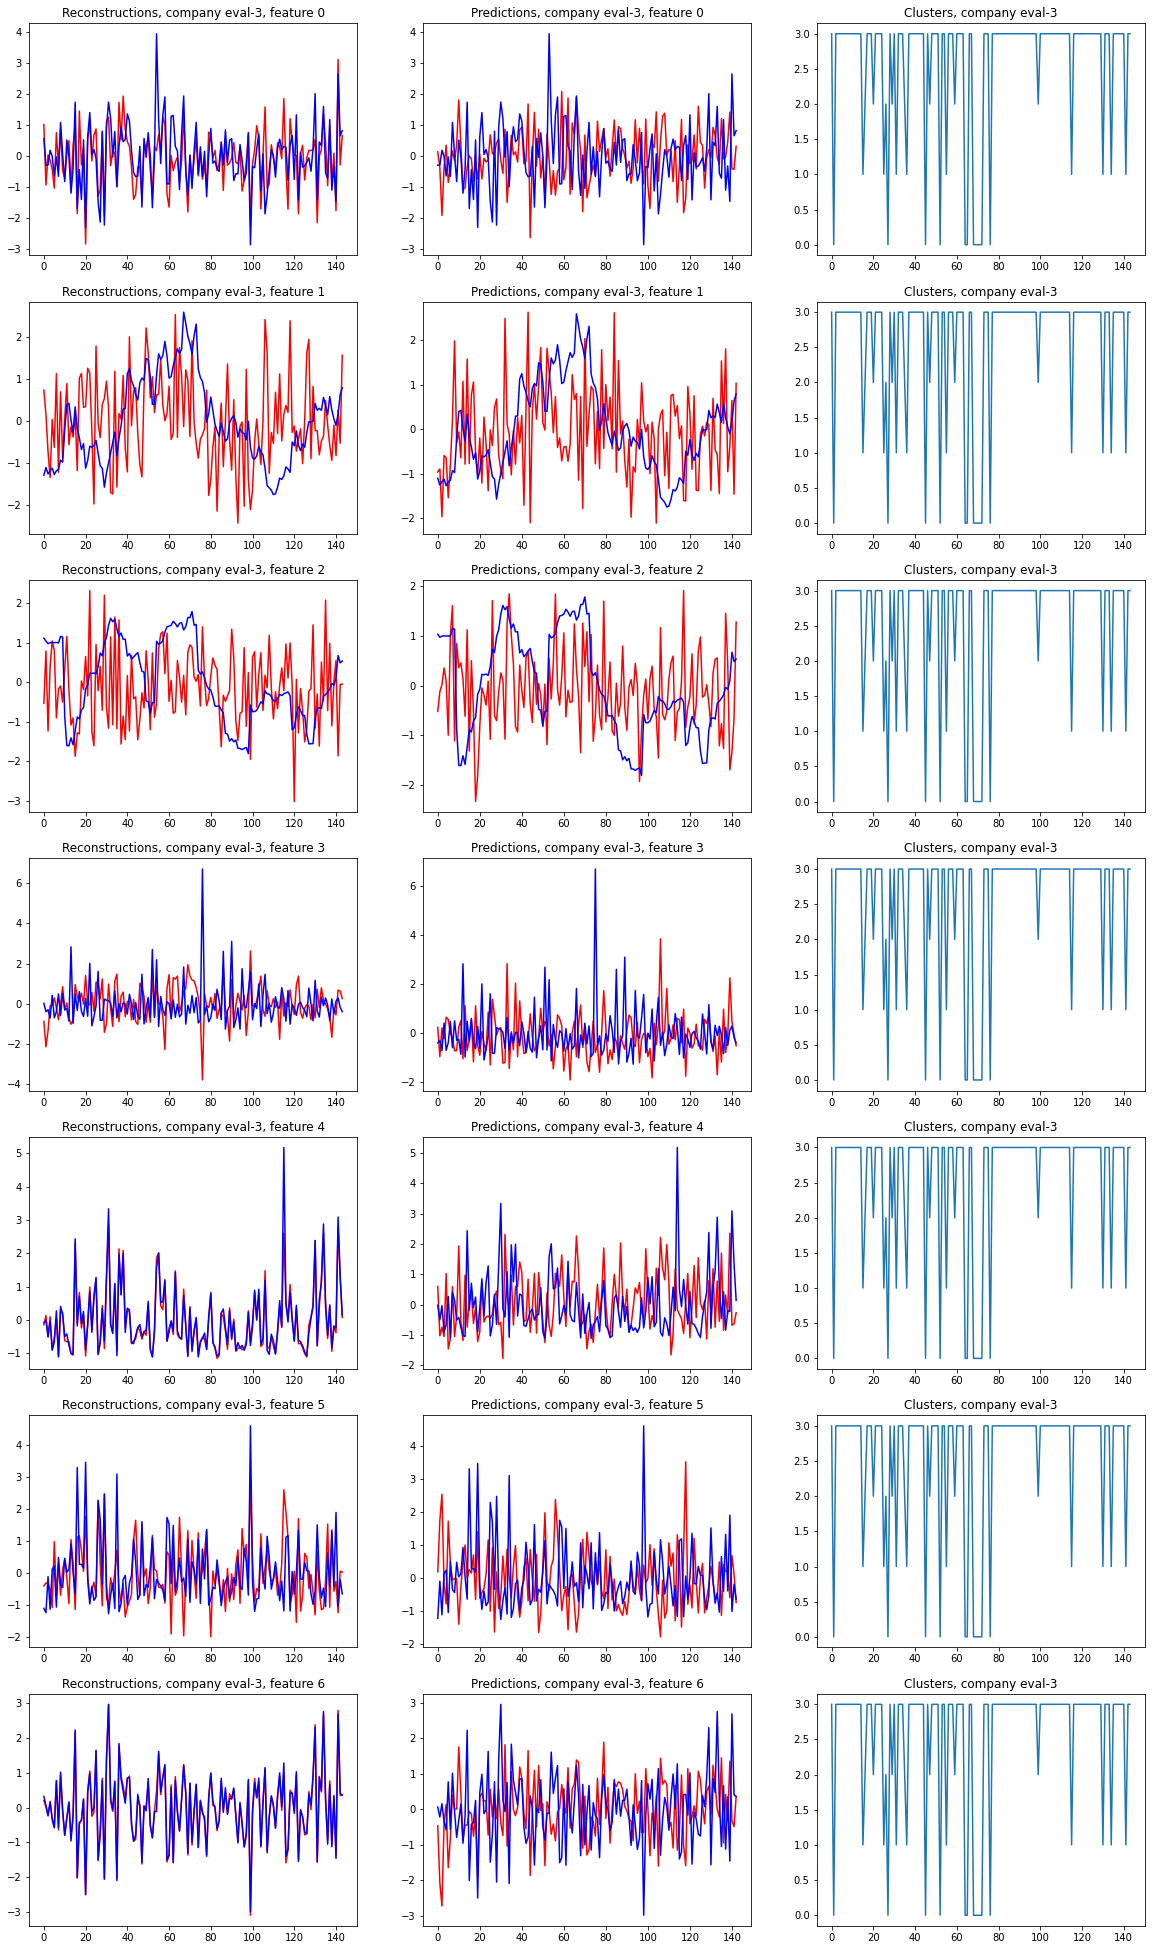

=================================== eval, company 35 ====================================


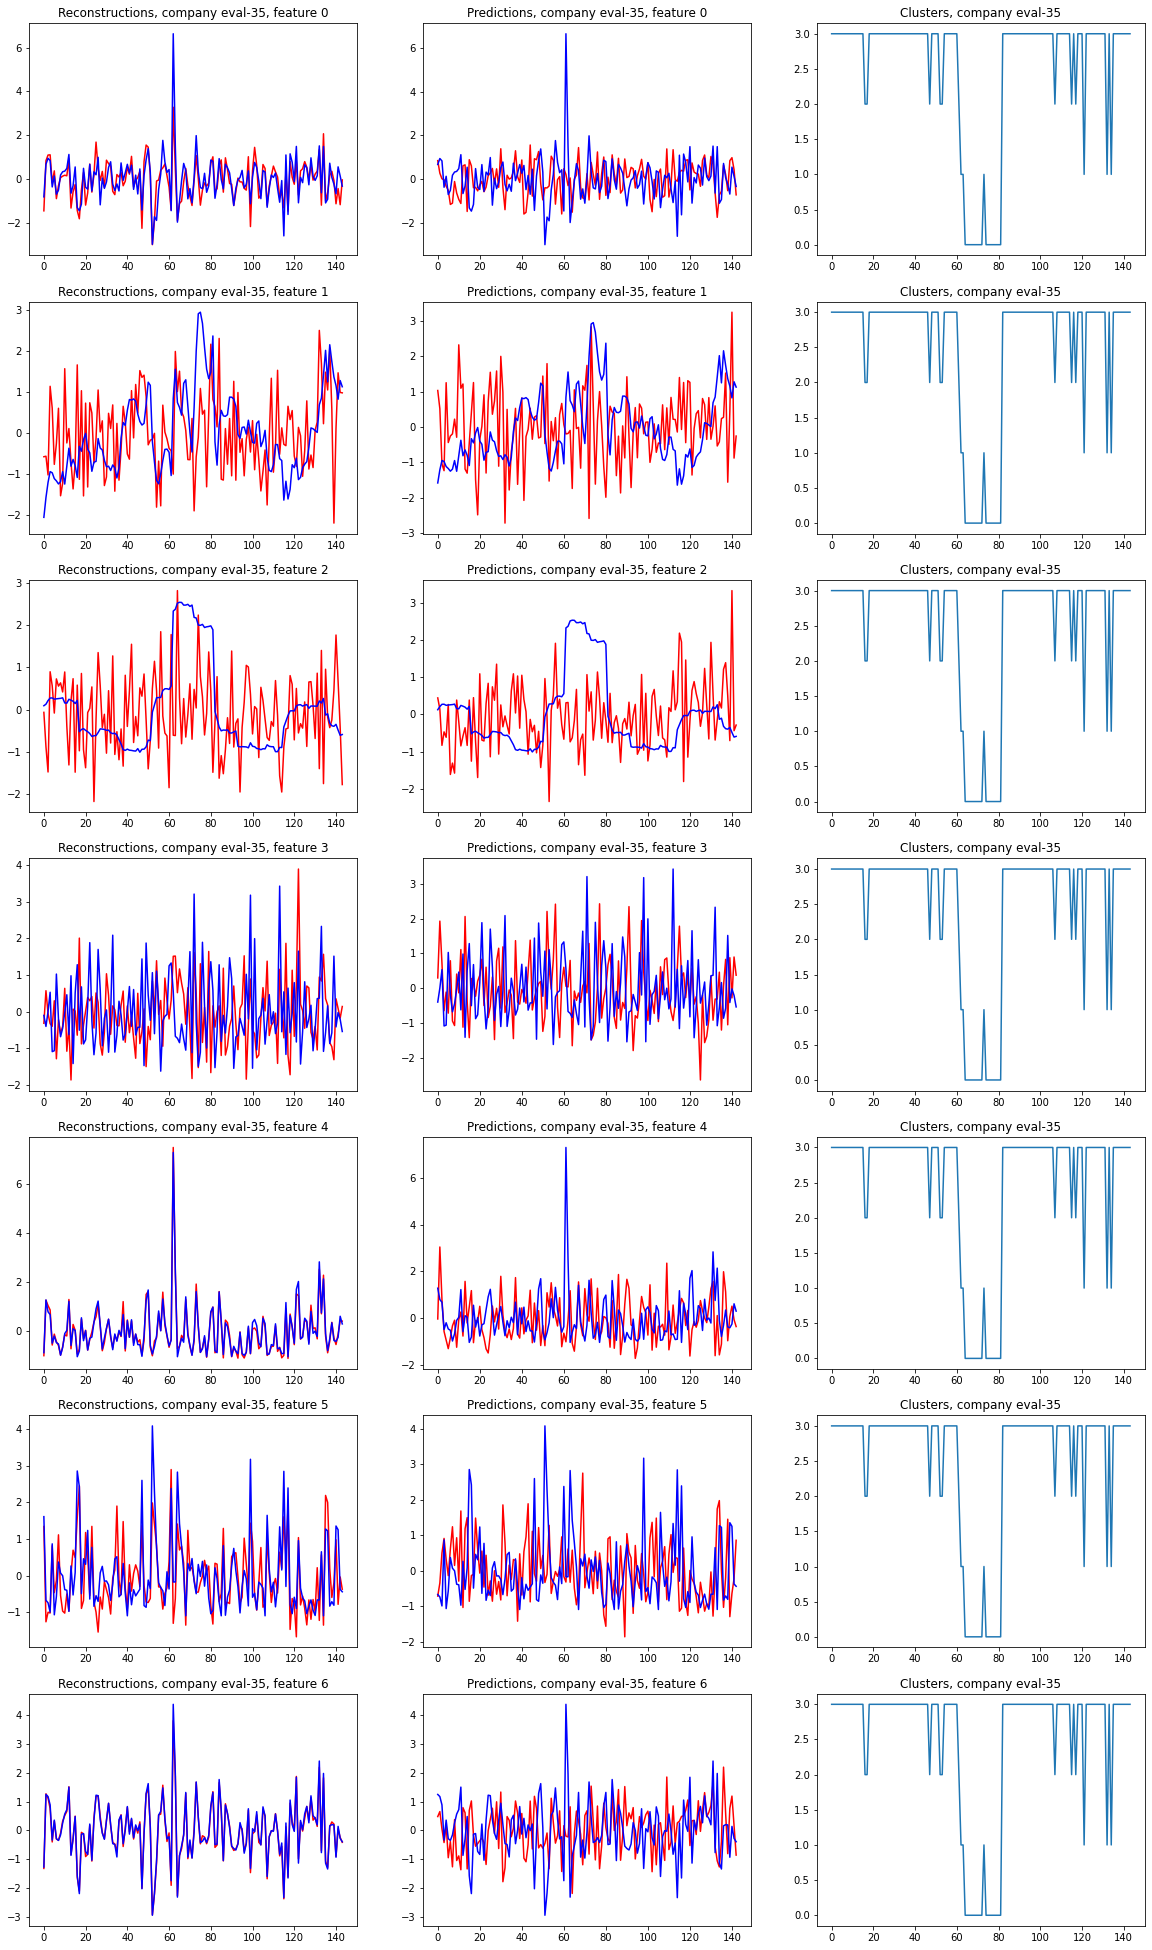

In [123]:
a, b = plot_tdpsom_results(data_train=data_train, data_eval=data_eval, save_dict=tdpsom_dict, N_companies=2, seed=42)

In [96]:
a

[327, 57, 12, 140]

In [97]:
b

[31, 28, 17, 13]